# Connect to G-Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Change Notebook Default Directory

In [ ]:
import os
file_dir = "/content/drive/MyDrive/DS_PROJECT1_HOMEWORK"
os.chdir(file_dir)

In [ ]:
!ls

'[Complete]Laptop_Price.csv'
'[SANBOX] DS PROJECT 1 - BY_MIFTAHUL.ipynb'
'[Sandbox] DS Project 1 - Laptop Price Dataset EDA.ipynb'


# Import Libraries

In [ ]:
# Data Analysis Libraries
import pandas as pd
import numpy as np

# Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes",
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=14,
       titlepad=10
)

# RegEx
import regex as re

<ipython-input-10-21f15e5228a1>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

# Load Dataset

In [ ]:
csv_filename = "[Complete]Laptop_Price.csv"
df = pd.read_csv(csv_filename)

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Dataframe Info

In [ ]:
# Dataframe Shape
df.shape

(1303, 13)

Dokumentasi:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html

dengan pandas.shape, kita mendapatkan bahwa dataframe yang kita miliki sekarang memiliki 1303 baris dan 13 kolom.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Observasi sementara:
- Laptop_ID, Inches, dan Price_euros bertipe numerik.
- Tidak ada null value
- Laptop_ID seharusnya memiliki value yg unique.


Dokumentasi: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html, untuk melihat apakah dalam dataframe terdapat nilai duplikat.

In [ ]:
# Dataframe Info (melihat apakah Laptop_ID memiliki nilai yg sama)
df.duplicated().sum()

0

Link Dokumentasi untuk melihat values duplikat pada semua kolom:

Dokumentasi: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/

Disini ada yang menarik sih, entah datanya yg kebanyakan, tapi dia ga muncul nih data duplikatnya di setiap kolom, sedangkan pada dokumentasi tersebut harusnya muncul.

In [ ]:
df[df.duplicated()]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros


In [ ]:
"""
Kalau kita traceback secara terperinci
adanih nilai duplikat pada company,
tapi ini gapenting sih, jadi skip aja, yang penting bagian laptop ID
"""

df.duplicated(subset=['Company']).sum()

1284

Dataframe yang kita punya sekarang tidak memiliki nilai duplikat pada kolom Laptop_ID.

In [ ]:
df.iloc[-1]

laptop_ID                                           1320
Company                                             Asus
Product              X553SA-XX031T (N3050/4GB/500GB/W10)
TypeName                                        Notebook
Inches                                              15.6
ScreenResolution                                1366x768
Cpu                 Intel Celeron Dual Core N3050 1.6GHz
Ram                                                  4GB
Memory                                         500GB HDD
Gpu                                    Intel HD Graphics
OpSys                                         Windows 10
Weight                                             2.2kg
Price_euros                                        369.0
Name: 1302, dtype: object

Disini kita dapat melihat, dari data yang kita punya dengan jumlah baris = 1302,didapati bahwa pada laptop_id, laptop id memiliki nilai akhir 1320, dalam artian terdapat id yang terlwat.

# Data Cleaning

## Lowering Columns Name
melakukan pengubahan nama kolom, menjadi huruf kecil semua, agar memudahkan kita dalam melakukan manipulasi data

In [ ]:
# Sebelum mengubah, liat-lihat dulu nama kolomnya.
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Dokumentasi : https://stackoverflow.com/questions/19726029/how-can-i-make-pandas-dataframe-column-headers-all-lowercase.

jika kita lihat pada dokumentasi tersebut, terdapat beberapa cara dalam mengubah nama kolom, agar menjadi huruf kecil, seperti :
1. df.columns = [x.lower() for x in df.columns]
2. df.columns = df.columns.str.lower()

In [ ]:
# Cara ke - 1 (data.headers.lowercase())
df.columns = [x.lower() for x in df.columns]

In [ ]:
df.head(2)

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [ ]:
# ini aku coba load lagi librarynya, untuk melihat cara yg lebih mudah. cara ke - 2
df.head(2)

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.head(2)

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


## Changing Price_euros name to Price

In [ ]:
df = df.rename({'price_euros' : 'price'}, axis=1)

In [ ]:
df.head(2)

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


# Data Cleaning + Feature Engineering (FE)

## Laptop ID

Okay Here we go, kita mulai dari laptop ID

In [ ]:
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
idx=0
for laptop_id in df['laptop_id']:
  if(idx+1 != laptop_id):
    print(idx)
    break
  idx += 1

64


In [ ]:
df.loc[df['laptop_id'] == 64, :]

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
63,64,Asus,UX410UA-GV350T (i5-8250U/8GB/256GB/FHD/W10),Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.4kg,941.0


In [ ]:
df.drop(columns=['laptop_id'], inplace=True)

Kita bisa drop 'laptop_id' karena kita bisa gunakan index baris saja sebagai id, dan 'laptop_id' tidak mengandung informasi apa-apa

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Screen Resolution

In [ ]:
df['screenresolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: screenresolution, Length: 1303, dtype: object

Disini kita dapat membagi, bagian screenresolution menjadi 3 bagian, yakni :
1. Jenis Panel
2. Touchscreen / Tidak
3. screen resolution

### FE on Screen Resolution

Step 1:
Langkah yang aku ambil, disini aku ambil resolusi layarnya dulu, yang paling mudah

In [ ]:
"""
disini dengan bantuan chatGPT dan regex translator
didapatkan hasil syntax regex sebagai berikut untuk memisahkan
teks resolusi screen
\d{4}x\d{4}
"""

### https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html


df['resolution'] = df['screenresolution'].str.extract(r'(\d+x\d+)')

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600


Step 2: Disini aku bakal ngambil bagian apakah jenis panelnya termasuk touchscreen atau tidak

In [ ]:
df['screentype'] = df['screenresolution'].replace(r'(\d+x\d+)', '', regex=True)

In [ ]:
"""
  Dokumentasi Replace :
  https://www.w3schools.com/python/ref_string_replace.asp

  pada dasarnya karena kita ingin mengambil selain resolusi,
  maka kita melakukan replace, atau mengganti resolusi dengan string kosong
"""


df['screentype'] = df['screenresolution'].replace(r'(\d+x\d+)', '', regex=True)
df['screentype']

0               IPS Panel Retina Display 
1                                        
2                                Full HD 
3               IPS Panel Retina Display 
4               IPS Panel Retina Display 
                      ...                
1298     IPS Panel Full HD / Touchscreen 
1299    IPS Panel Quad HD+ / Touchscreen 
1300                                     
1301                                     
1302                                     
Name: screentype, Length: 1303, dtype: object

In [ ]:
df['screentype'] = df['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)', '', regex=True)

In [ ]:
# disini kita udah dapetin jenis touchscreennya atau tidak
df['Touchscreen'] = df['screentype'].str.extract(r'(Touchscreen)')
df['Touchscreen']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1298    Touchscreen
1299    Touchscreen
1300            NaN
1301            NaN
1302            NaN
Name: Touchscreen, Length: 1303, dtype: object

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPS Panel Retina Display,NaN
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,,NaN
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPS Panel Retina Display,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPS Panel Retina Display,NaN


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df['touchscreen'].value_counts()

Touchscreen    192
Name: touchscreen, dtype: int64

In [ ]:
# Melakukan replace jika touchscreen = 1 & Jika tidak touchscreen = 0
df['touchscreen'] = df['touchscreen'].replace('Touchscreen', 1)
df['touchscreen'] = df['touchscreen'].replace(np.nan, 0)

In [ ]:
df[df['touchscreen'] == 1].head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
19,Dell,XPS 13,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22kg,979.0,1920x1080,IPS Panel Touchscreen,1.0
23,Dell,Inspiron 5379,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,819.0,1920x1080,Touchscreen,1.0
33,Dell,XPS 13,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,1869.0,3200x1800,Touchscreen,1.0
44,Dell,Inspiron 7773,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,12GB,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77kg,999.0,1920x1080,Touchscreen,1.0
50,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,0.69kg,319.0,1920x1200,IPS Panel Touchscreen,1.0


Step 3 : ngerapihin data screentypenya

In [ ]:
df['screentype'] = df['screentype'].replace(r'(Touchscreen)', '', regex=True)

In [ ]:
# disini aku coba bersiin data screentypenya
df[df['touchscreen']==1].head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
19,Dell,XPS 13,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22kg,979.0,1920x1080,IPS Panel,1.0
23,Dell,Inspiron 5379,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,819.0,1920x1080,,1.0
33,Dell,XPS 13,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,1869.0,3200x1800,,1.0
44,Dell,Inspiron 7773,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,12GB,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77kg,999.0,1920x1080,,1.0
50,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,0.69kg,319.0,1920x1200,IPS Panel,1.0


In [ ]:
# kita lihat ada berapa jenis data screentypenya
df['screentype'].unique()

array(['IPS Panel Retina Display ', '', ' ', 'IPS Panel  ',
       'IPS Panel    ', '   ', 'IPS Panel '], dtype=object)

Disini aku rasa kita punya 3 data ya, yang dimana bisa dibagi jadi
1. IPS Panel Retina Display
2. IPS Panel
3. " " (dan jenis lainnya)

In [ ]:
df['screentype'] = df['screentype'].replace(r' ', '' ,regex=True)
df['screentype'].value_counts()

                         938
IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,,0.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0


Dapat kita lihat bahwa pada screentype masih memiliki nilai yang kosong, kita dapat mengisi nilai kosong tersebut dengan null value.

In [ ]:
"""
  Regex Code : ^\s*$
  Arti :

  Ekspresi reguler ^\s*$ adalah pola yang mencocokkan dengan baris kosong
  atau baris yang hanya terdiri dari spasi atau karakter whitespace.

  Penjelasan komponen dari regex ini:
  ^: Mencocokkan awal dari string.
  \s: Mencocokkan dengan karakter whitespace (spasi, tab, newline, dll).
  *: Mencocokkan 0 atau lebih dari karakter sebelumnya (dalam hal ini, karakter whitespace).
"""

df['screentype'] = df['screentype'].replace(r'^\s*$', np.nan, regex=True)
df['screentype'].value_counts()

IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [ ]:
df['screentype'].value_counts(dropna=False)

NaN                      938
IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0


## CPU

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0


In [ ]:
#disini kita bakal coba ngambil frekuensi kecepatan CPUnya
"""
  Regex (\d+(?:\.\d+)?GHz) adalah sebuah pola pencocokan (pattern matching)
  yang digunakan untuk mencari string yang mengikuti format tertentu.
  Di dalam kasus ini, pola ini mencocokkan string dengan format berikut:

  \d+: Mengartikan satu atau lebih digit (0-9).
  (?: ...): \.\d+ yang berarti mencocokkan titik (.) diikuti oleh satu atau lebih digit.
  GHz: Mencocokkan teks "GHz" secara harfiah.
"""

df['cpu_freq'] = df['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)')

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3GHz
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8GHz
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5GHz
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7GHz
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1GHz


In [ ]:
df.rename({'cpu_freq':'cpu_freq(GHz)'}, axis=1, inplace=1)

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3GHz
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8GHz
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5GHz
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7GHz
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1GHz


In [ ]:
df['cpu_freq(GHz)'] = df['cpu_freq(GHz)'].replace(r'(GHz)', '', regex=True)

In [ ]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   product           1303 non-null   object 
 2   typename          1303 non-null   object 
 3   inches            1303 non-null   float64
 4   screenresolution  1303 non-null   object 
 5   cpu               1303 non-null   object 
 6   ram               1303 non-null   object 
 7   memory            1303 non-null   object 
 8   gpu               1303 non-null   object 
 9   opsys             1303 non-null   object 
 10  weight            1303 non-null   object 
 11  price             1303 non-null   float64
 12  resolution        1303 non-null   object 
 13  screentype        365 non-null    object 
 14  touchscreen       1303 non-null   float64
 15  cpu_freq(GHz)     1303 non-null   object 
dtypes: float64(3), object(13)
memory usage: 16

kita sudah melakukan replace cpu_freqnya menjadi sebuah float, akan tetapi jika kita panggil cpu_freqnya, dia masih sebuah object. kita perlu merubahnya ke dalam sebuah float.

In [ ]:
"""
  Dokumentasi : https://datatofish.com/convert-string-to-float-dataframe/
  kita dapat menggunakan .astype() untuk mengubah tipe data
"""
df['cpu_freq(GHz)'] = df['cpu_freq(GHz)'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   product           1303 non-null   object 
 2   typename          1303 non-null   object 
 3   inches            1303 non-null   float64
 4   screenresolution  1303 non-null   object 
 5   cpu               1303 non-null   object 
 6   ram               1303 non-null   object 
 7   memory            1303 non-null   object 
 8   gpu               1303 non-null   object 
 9   opsys             1303 non-null   object 
 10  weight            1303 non-null   object 
 11  price             1303 non-null   float64
 12  resolution        1303 non-null   object 
 13  screentype        365 non-null    object 
 14  touchscreen       1303 non-null   float64
 15  cpu_freq(GHz)     1303 non-null   float64
dtypes: float64(4), object(12)
memory usage: 16

In [ ]:
# Mengambil tipe CPU pada CPU
df['cpu_type'] = df['cpu'].replace(r'(\d+(?:\.\d+)?GHz)','',regex=True)

Okay good, karena kita udah enggak ngebutuhin screenresolution dan cpu, kita dapat melakukan drop column pada kedua kolom tersebut.

In [ ]:
df.drop(['screenresolution'], axis=1, inplace=True)

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,Intel Core i5
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5


## RAM

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,Intel Core i5
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5


In [ ]:
df['ram'] = df['ram'].replace(r'GB', '', regex=True).astype(int)
df.rename({'ram' : 'ram(GB)'}, axis=1, inplace=True)

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,Intel Core i5
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        1303 non-null   object 
 1   product        1303 non-null   object 
 2   typename       1303 non-null   object 
 3   inches         1303 non-null   float64
 4   cpu            1303 non-null   object 
 5   ram(GB)        1303 non-null   int64  
 6   memory         1303 non-null   object 
 7   gpu            1303 non-null   object 
 8   opsys          1303 non-null   object 
 9   weight         1303 non-null   object 
 10  price          1303 non-null   float64
 11  resolution     1303 non-null   object 
 12  screentype     365 non-null    object 
 13  touchscreen    1303 non-null   float64
 14  cpu_freq(GHz)  1303 non-null   float64
 15  cpu_type       1303 non-null   object 
dtypes: float64(4), int64(1), object(11)
memory usage: 163.0+ KB


## Memory (Drive)

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,Intel Core i5
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5


In [ ]:
df['memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
df['memory_1'] = df['memory']
df['memory_1'] = df['memory_1'].str.replace('1.0TB','1TB', regex=True)
df['memory_1'] = df['memory_1'].str.replace('1TB','1000GB')
df['memory_1'] = df['memory_1'].str.replace('2TB','2000GB')
df['memory_1'] = df['memory_1'].str.replace('GB','')
df['memory_1'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [ ]:
df['memory_2'] = df['memory_1'].str.replace(r' ','')
df['memory_2'].value_counts()

256SSD                    412
1000HDD                   224
500HDD                    132
512SSD                    118
128SSD+1000HDD             94
128SSD                     76
256SSD+1000HDD             73
32FlashStorage             38
2000HDD                    16
64FlashStorage             15
512SSD+1000HDD             14
1000SSD                    14
256SSD+2000HDD             10
1000Hybrid                  9
256FlashStorage             8
16FlashStorage              7
32SSD                       6
180SSD                      5
128FlashStorage             4
512SSD+2000HDD              3
16SSD                       3
512FlashStorage             2
1000SSD+1000HDD             2
256SSD+500HDD               2
128SSD+2000HDD              2
256SSD+256SSD               2
512SSD+256SSD               1
512SSD+512SSD               1
64FlashStorage+1000HDD      1
1000HDD+1000HDD             1
32HDD                       1
64SSD                       1
128HDD                      1
240SSD    

In [ ]:
memory1 = []
memory2 = []

for i in df['memory_2']:
  if len(re.findall(r'\+', i)) == 1: # double drive
    one = re.findall(r'(\w+)', i)
    memory1.append(one[0])
    memory2.append(one[1])
  else:
    one = re.findall(r'(\w+)', i)
    memory1.append(one[0])
    memory2.append(np.nan)

dokumentasi dari re.findall ada dibawah ini, yg dimana jika terdapat teks memory 1 dan memori 2 yang dibagung dengan +, maka kita dapat menjadikan ke dalam sebuah list dengan index 0 dan 1, menggunakan regex (\w+) findall.

In [ ]:
print(re.findall(r'\+', "240SSD "))
print(re.findall(r'(\w+)', "256SSD+1000Hybrid"))

[]
['256SSD', '1000Hybrid']


In [ ]:
print(re.findall(r'\+', "240SSD "))
print(re.findall(r'(\w+)', "240SSD "))

[]
['240SSD']


In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type,memory_1,memory_2
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5,128 SSD,128SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,Intel Core i5,128 Flash Storage,128FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U,256 SSD,256SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7,512 SSD,512SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5,256 SSD,256SSD


sekarang mari kita masukkan hasil memory 1 dan memory 2 yang telah kita buat ke dalam dataframe

In [ ]:
df['memory_1'] = memory1
df['memory_2'] = memory2

In [ ]:
df['memory1_storage'] = df['memory_1'].str.extract(r'(\d+)').astype(float)
df['memory2_storage'] = df['memory_2'].str.extract(r'(\d+)').astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          1303 non-null   object 
 1   product          1303 non-null   object 
 2   typename         1303 non-null   object 
 3   inches           1303 non-null   float64
 4   cpu              1303 non-null   object 
 5   ram(GB)          1303 non-null   int64  
 6   memory           1303 non-null   object 
 7   gpu              1303 non-null   object 
 8   opsys            1303 non-null   object 
 9   weight           1303 non-null   object 
 10  price            1303 non-null   float64
 11  resolution       1303 non-null   object 
 12  screentype       365 non-null    object 
 13  touchscreen      1303 non-null   float64
 14  cpu_freq(GHz)    1303 non-null   float64
 15  cpu_type         1303 non-null   object 
 16  memory_1         1303 non-null   object 
 17  memory_2      

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type,memory_1,memory_2,memory1_storage,memory2_storage
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5,128SSD,NaN,128.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,Intel Core i5,128FlashStorage,NaN,128.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U,256SSD,NaN,256.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7,512SSD,NaN,512.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5,256SSD,NaN,256.0,NaN


sekarang kita tinggal melakukan pemetaan jenis memorinya dari memory 1 & memory 2 menggunakan regex.

In [ ]:
df['memory1_type'] = df['memory_1'].str.replace(r'(\d+)', '', regex=True)
df['memory2_type'] = df['memory_2'].str.replace(r'(\d+)', '', regex=True)

In [ ]:
df.drop(['memory_1', 'memory_2'], axis=1, inplace=True)

In [ ]:
df = df.replace({'NaN': np.nan})

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type,memory1_storage,memory2_storage,memory1_type,memory2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5,128.0,NaN,SSD,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,Intel Core i5,128.0,NaN,FlashStorage,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U,256.0,NaN,SSD,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7,512.0,NaN,SSD,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5,256.0,NaN,SSD,NaN


In [ ]:
df.rename({
    'memory1_storage' : 'memory1_storage(GB)',
    'memory2_storage' : 'memory2_storage(GB)'
}, axis=1, inplace=True)

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type,memory1_storage(GB),memory2_storage(GB),memory1_type,memory2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5,128.0,NaN,SSD,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,Intel Core i5,128.0,NaN,FlashStorage,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U,256.0,NaN,SSD,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7,512.0,NaN,SSD,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5,256.0,NaN,SSD,NaN


disini kita akan coba mengurutkan nama colom seperti:
memory1_storage(GB) | memory1_type | memory2 dst

In [ ]:
"""
 Dokumentasi :
 https://www.w3schools.com/python/pandas/ref_df_pop.asp
 https://saturncloud.io/blog/pandas-tips-reorder-columns/#:~:text=To%20move%20a%20column%20to,modifies%20the%20DataFrame%20in%2Dplace.&text=In%20summary%2C%20depending%20on%20the,columns%20to%20the%20desired%20order.
 https://www.statology.org/insert-column-pandas-dataframe/
"""
pop_memory1 = df.pop('memory1_type')
pop_memory2 = df.pop('memory2_type')
df.insert(16, 'memory1_type', pop_memory1)
df.insert(len(df.columns), 'memory2_type', pop_memory2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1303 non-null   object 
 1   product              1303 non-null   object 
 2   typename             1303 non-null   object 
 3   inches               1303 non-null   float64
 4   cpu                  1303 non-null   object 
 5   ram(GB)              1303 non-null   int64  
 6   memory               1303 non-null   object 
 7   gpu                  1303 non-null   object 
 8   opsys                1303 non-null   object 
 9   weight               1303 non-null   object 
 10  price                1303 non-null   float64
 11  resolution           1303 non-null   object 
 12  screentype           365 non-null    object 
 13  touchscreen          1303 non-null   float64
 14  cpu_freq(GHz)        1303 non-null   float64
 15  cpu_type             1303 non-null   o

## Weight

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type,memory1_type,memory1_storage(GB),memory2_storage(GB),memory2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5,SSD,128.0,NaN,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,Intel Core i5,FlashStorage,128.0,NaN,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U,SSD,256.0,NaN,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7,SSD,512.0,NaN,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5,SSD,256.0,NaN,NaN


In [ ]:
df.rename({'weight' : 'weight(Kg)'}, axis=1, inplace=True)

In [ ]:
df['weight(Kg)'] = df['weight(Kg)'].str.extract(r'(\d+.\d+)').astype(float)

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(Kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type,memory1_type,memory1_storage(GB),memory2_storage(GB),memory2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5,SSD,128.0,NaN,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,Intel Core i5,FlashStorage,128.0,NaN,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U,SSD,256.0,NaN,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7,SSD,512.0,NaN,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5,SSD,256.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1303 non-null   object 
 1   product              1303 non-null   object 
 2   typename             1303 non-null   object 
 3   inches               1303 non-null   float64
 4   cpu                  1303 non-null   object 
 5   ram(GB)              1303 non-null   int64  
 6   memory               1303 non-null   object 
 7   gpu                  1303 non-null   object 
 8   opsys                1303 non-null   object 
 9   weight(Kg)           1253 non-null   float64
 10  price                1303 non-null   float64
 11  resolution           1303 non-null   object 
 12  screentype           365 non-null    object 
 13  touchscreen          1303 non-null   float64
 14  cpu_freq(GHz)        1303 non-null   float64
 15  cpu_type             1303 non-null   o

## CPU & GPU Manifacturing Companies

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(Kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type,memory1_type,memory1_storage(GB),memory2_storage(GB),memory2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5,SSD,128.0,NaN,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,Intel Core i5,FlashStorage,128.0,NaN,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U,SSD,256.0,NaN,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7,SSD,512.0,NaN,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5,SSD,256.0,NaN,NaN


disini kita akan membedah CPU brand dan GPU brand dari setiap merek laptop

In [ ]:
df['cpu_brand'] = df['cpu_type'].str.extract(r'^(\w+)')
df['cpu_brand'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: cpu_brand, dtype: int64

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight(Kg),...,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type,memory1_type,memory1_storage(GB),memory2_storage(GB),memory2_type,cpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5,SSD,128.0,NaN,NaN,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1440x900,NaN,0.0,1.8,Intel Core i5,FlashStorage,128.0,NaN,NaN,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U,SSD,256.0,NaN,NaN,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7,SSD,512.0,NaN,NaN,Intel
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5,SSD,256.0,NaN,NaN,Intel


In [ ]:
cpu_brand = df.pop('cpu_brand')
df.insert(6, 'cpu_brand', cpu_brand)

In [ ]:
df['gpu_brand'] = df['gpu'].str.extract(r'^(\w+)')
df['cpu_brand'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: cpu_brand, dtype: int64

In [ ]:
gpu_brand = df.pop('gpu_brand')
df.insert(7, 'gpu_brand', gpu_brand)

In [ ]:
df.head()

,company,product,typename,inches,cpu,ram(GB),cpu_brand,gpu_brand,memory,gpu,...,price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type,memory1_type,memory1_storage(GB),memory2_storage(GB),memory2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel,Intel,128GB SSD,Intel Iris Plus Graphics 640,...,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5,SSD,128.0,NaN,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel,Intel,128GB Flash Storage,Intel HD Graphics 6000,...,898.94,1440x900,NaN,0.0,1.8,Intel Core i5,FlashStorage,128.0,NaN,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel,Intel,256GB SSD,Intel HD Graphics 620,...,575.00,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U,SSD,256.0,NaN,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,Intel,AMD,512GB SSD,AMD Radeon Pro 455,...,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7,SSD,512.0,NaN,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel,Intel,256GB SSD,Intel Iris Plus Graphics 650,...,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5,SSD,256.0,NaN,NaN


# Now dataset is clean and ready to explore

In [ ]:
df.to_csv('[Cleaned]Laptop_Price.csv', index=False)

# Exploratory Data Analysis (EDA)

## Load Cleaned Dataset

In [ ]:
df1 = pd.read_csv('[Cleaned]Laptop_Price.csv')
df1.head()

,company,product,typename,inches,ram(GB),memory,cpu_brand,gpu_brand,gpu,opsys,...,price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type,memory1_storage(GB),memory1_type,memory2_storage(GB),memory2_type
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel,Intel,Intel Iris Plus Graphics 640,macOS,...,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel Core i5,128.0,SSD,NaN,NaN
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel,Intel,Intel HD Graphics 6000,macOS,...,898.94,1440x900,NaN,0.0,1.8,Intel Core i5,128.0,FlashStorage,NaN,NaN
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel,Intel,Intel HD Graphics 620,No OS,...,575.00,1920x1080,NaN,0.0,2.5,Intel Core i5 7200U,256.0,SSD,NaN,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,Intel,AMD,AMD Radeon Pro 455,macOS,...,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel Core i7,512.0,SSD,NaN,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel,Intel,Intel Iris Plus Graphics 650,macOS,...,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel Core i5,256.0,SSD,NaN,NaN


In [ ]:
df_clean = df1.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1303 non-null   object 
 1   product              1303 non-null   object 
 2   typename             1303 non-null   object 
 3   inches               1303 non-null   float64
 4   ram(GB)              1303 non-null   int64  
 5   memory               1303 non-null   object 
 6   cpu_brand            1303 non-null   object 
 7   gpu_brand            1303 non-null   object 
 8   gpu                  1303 non-null   object 
 9   opsys                1303 non-null   object 
 10  weight(Kg)           1253 non-null   float64
 11  price                1303 non-null   float64
 12  resolution           1303 non-null   object 
 13  screentype           365 non-null    object 
 14  touchscreen          1303 non-null   float64
 15  cpu_freq(GHz)        1303 non-null   f

## Custom functions to improve plot readability

In [ ]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

## Which brand is the most frequent in the dataframe?

In [ ]:
df['company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: company, dtype: int64

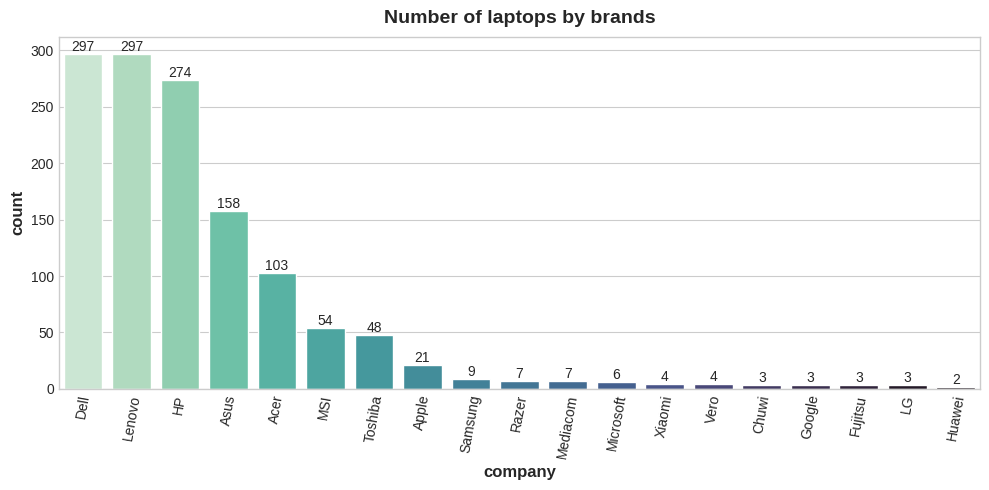

In [ ]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='company', data=df, palette='mako_r', order = df['company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brands')
plt.show()

insight :
- Pada Dataset ini, peredaran laptop terbanyak dipegang oleh Dell & Levono.

## What type of laptop is the most frequent?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1303 non-null   object 
 1   product              1303 non-null   object 
 2   typename             1303 non-null   object 
 3   inches               1303 non-null   float64
 4   cpu                  1303 non-null   object 
 5   ram(GB)              1303 non-null   int64  
 6   cpu_brand            1303 non-null   object 
 7   gpu_brand            1303 non-null   object 
 8   memory               1303 non-null   object 
 9   gpu                  1303 non-null   object 
 10  opsys                1303 non-null   object 
 11  weight(Kg)           1253 non-null   float64
 12  price                1303 non-null   float64
 13  resolution           1303 non-null   object 
 14  screentype           365 non-null    object 
 15  touchscreen          1303 non-null   f

In [ ]:
df['typename'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: typename, dtype: int64

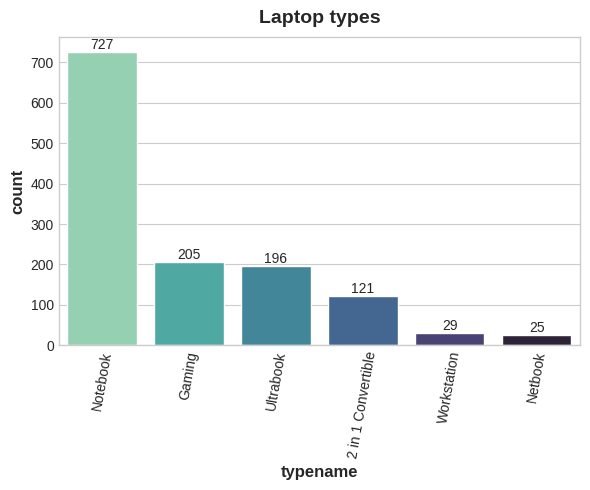

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='typename', data=df, palette='mako_r', order=df['typename'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop types')
plt.show()

In [ ]:
df[df['typename'] != 'Notebook']['typename'].count()

576

insight :
- Laptop terbanyak yakni laptop berjenis notebook
- jika semua laptop selain 'notebook' dijumlahkan, jumlahnya masih belum bisa menyaingi laptop berjenis Notebook

In [ ]:
print('Most laptops are notebooks, which make {:.2f}% of the total laptops'.format(len(df[df['typename']=='Notebook'])*100/len(df)))

Most laptops are notebooks, which make 55.79% of the total laptops


## Which size is the most popular?

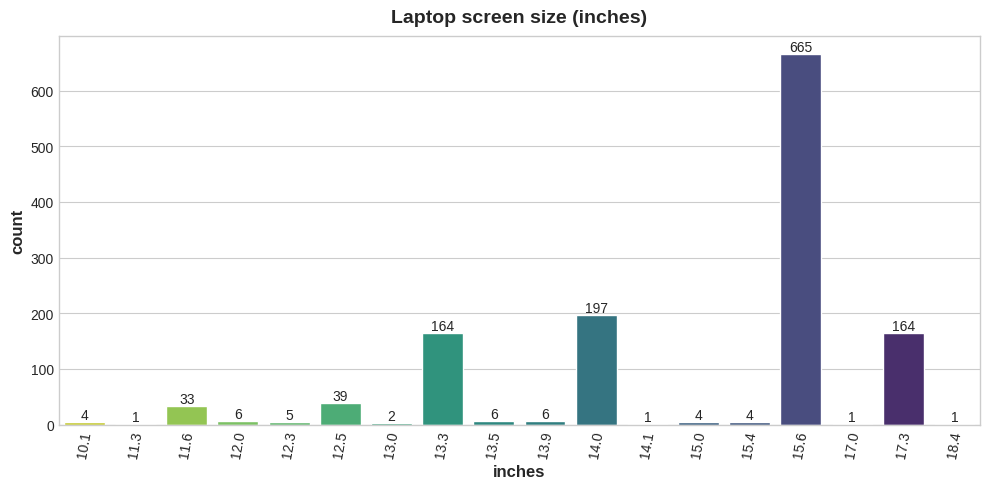

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='inches', data=df, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [ ]:
print('Most laptops have 15.6 inches, which make {:.2f}% of the total laptops'.format(len(df[df['inches']==15.6])*100/len(df)))

Most laptops have 15.6 inches, which make 51.04% of the total laptops


In [ ]:
inches_list = df['inches'].value_counts().index[:6].tolist()
inches_list
df_clean = df_clean[df_clean['inches'].isin(inches_list)]

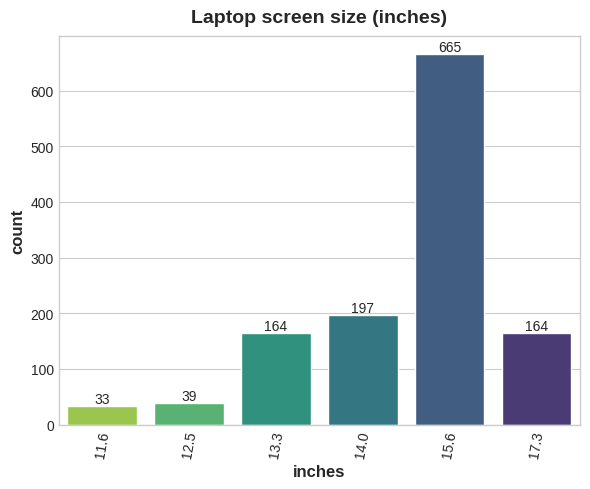

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='inches', data=df_clean, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [ ]:
print('We removed {} outliers!'.format(len(df)-len(df_clean)))

We removed 41 outliers!


## How is weight distributed among the laptops?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1303 non-null   object 
 1   product              1303 non-null   object 
 2   typename             1303 non-null   object 
 3   inches               1303 non-null   float64
 4   cpu                  1303 non-null   object 
 5   ram(GB)              1303 non-null   int64  
 6   cpu_brand            1303 non-null   object 
 7   gpu_brand            1303 non-null   object 
 8   memory               1303 non-null   object 
 9   gpu                  1303 non-null   object 
 10  opsys                1303 non-null   object 
 11  weight(Kg)           1253 non-null   float64
 12  price                1303 non-null   float64
 13  resolution           1303 non-null   object 
 14  screentype           365 non-null    object 
 15  touchscreen          1303 non-null   f

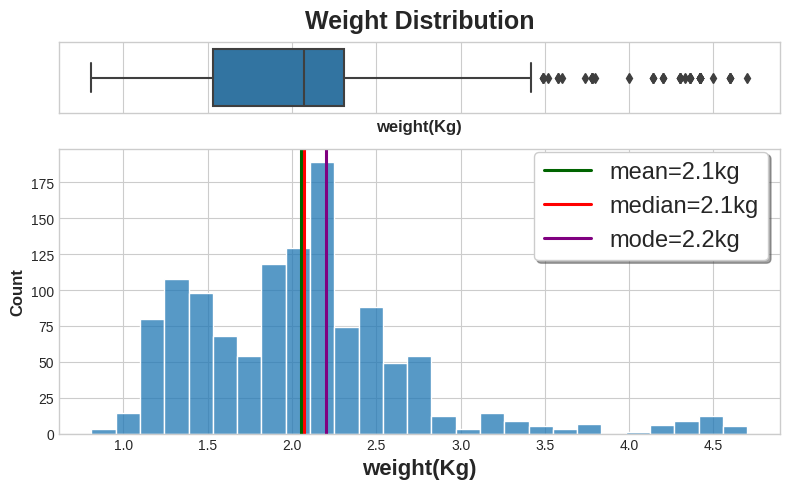

In [ ]:
num_plot(df_clean, 'weight(Kg)', 'Weight Distribution','kg')

## How is price distributed among the laptops?

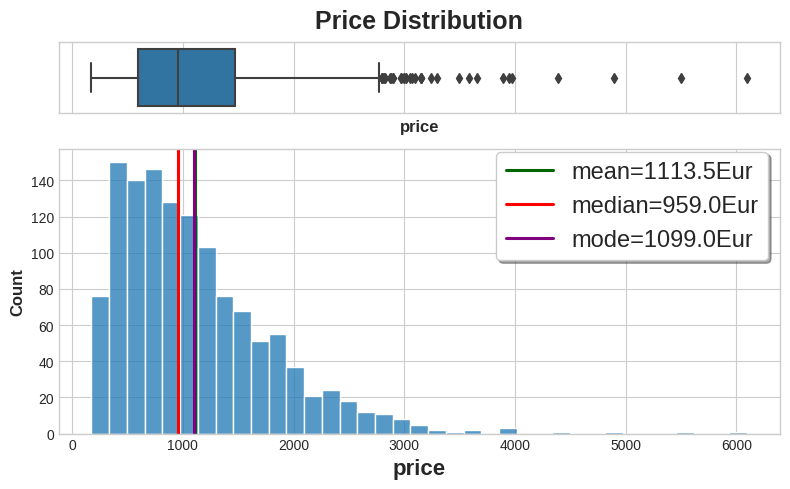

In [ ]:
num_plot(df_clean, 'price', 'Price Distribution','Eur')

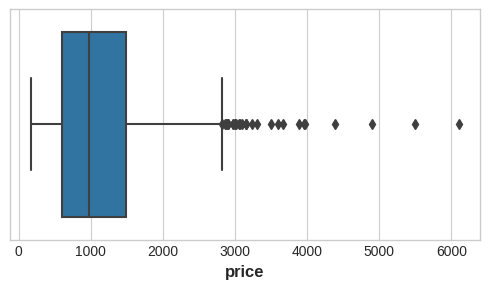

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))
ax=sns.boxplot(x='price', data=df)

In [ ]:
df[df['price'] > 3000]

,company,product,typename,inches,cpu,ram(GB),cpu_brand,gpu_brand,memory,gpu,...,price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type,memory1_type,memory1_storage(GB),memory2_storage(GB),memory2_type
196,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32,Intel,Nvidia,1TB SSD,Nvidia GeForce GTX 1080,...,6099.00,3840x2160,NaN,1.0,2.9,Intel Core i7 7820HK,SSD,1000.0,NaN,NaN
204,Dell,Precision 7520,Workstation,15.6,Intel Xeon E3-1505M V6 3GHz,16,Intel,Nvidia,256GB SSD + 1TB HDD,Nvidia Quadro M1200,...,3055.00,3840x2160,NaN,0.0,3.0,Intel Xeon E3-1505M V6,SSD,256.0,1000.0,HDD
238,Asus,ROG G703VI-E5062T,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32,Intel,Nvidia,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,...,3890.00,1920x1080,NaN,0.0,2.9,Intel Core i7 7820HK,SSD,512.0,1000.0,HDD
530,Dell,Alienware 17,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,16,Intel,Nvidia,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,...,3012.77,1920x1080,IPSPanel,0.0,2.8,Intel Core i7 7700HQ,SSD,128.0,1000.0,HDD
610,Lenovo,Thinkpad P51,Notebook,15.6,Intel Xeon E3-1535M v6 3.1GHz,32,Intel,Nvidia,1TB SSD,Nvidia Quadro M2200M,...,4899.00,3840x2160,IPSPanel,0.0,3.1,Intel Xeon E3-1535M v6,SSD,1000.0,NaN,NaN
659,Dell,Alienware 17,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,32,Intel,Nvidia,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,...,3147.37,3840x2160,IPSPanel,0.0,2.8,Intel Core i7 7700HQ,SSD,512.0,1000.0,HDD
723,Dell,Alienware 17,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,32,Intel,Nvidia,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,...,3659.40,3840x2160,NaN,0.0,2.8,Intel Core i7 7700HQ,SSD,1000.0,1000.0,HDD
744,Lenovo,Thinkpad P51s,Workstation,15.6,Intel Core i7 7600U 2.8GHz,16,Intel,Nvidia,1TB SSD,Nvidia Quadro M520M,...,3299.00,3840x2160,IPSPanel,0.0,2.8,Intel Core i7 7600U,SSD,1000.0,NaN,NaN
749,HP,Zbook 17,Workstation,17.3,Intel Xeon E3-1535M v5 2.9GHz,16,Intel,Nvidia,256GB SSD,Nvidia Quadro M2000M,...,4389.00,1920x1080,IPSPanel,0.0,2.9,Intel Xeon E3-1535M v5,SSD,256.0,NaN,NaN
780,Dell,Alienware 17,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,32,Intel,Nvidia,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070M,...,3588.80,1920x1080,IPSPanel,0.0,2.8,Intel Core i7 7700HQ,SSD,1000.0,1000.0,HDD


In [ ]:
max_price = df['price'].max()
df[df['price'] == max_price]

,company,product,typename,inches,cpu,ram(GB),cpu_brand,gpu_brand,memory,gpu,...,price,resolution,screentype,touchscreen,cpu_freq(GHz),cpu_type,memory1_type,memory1_storage(GB),memory2_storage(GB),memory2_type
196,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32,Intel,Nvidia,1TB SSD,Nvidia GeForce GTX 1080,...,6099.0,3840x2160,NaN,1.0,2.9,Intel Core i7 7820HK,SSD,1000.0,NaN,NaN


## How is RAM distributed among the laptops?

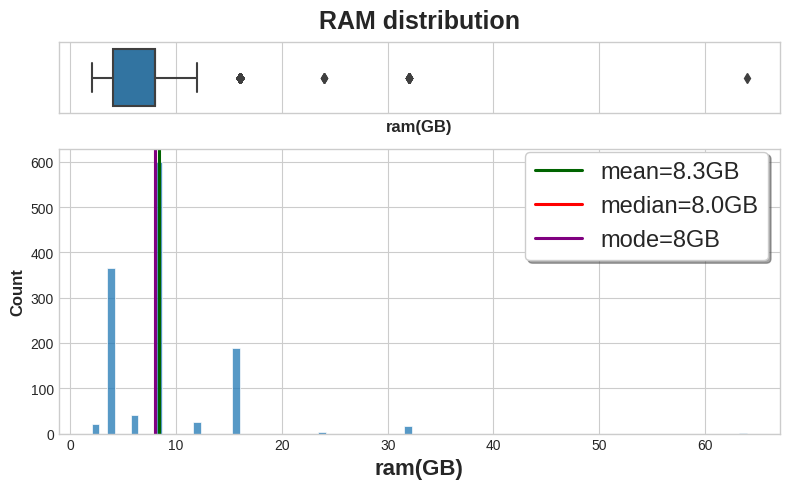

In [ ]:
num_plot(df_clean, 'ram(GB)','RAM distribution','GB')

In [ ]:
print('Most laptops have 8 GB RAM, which make {:.2f}% of the total laptops'.format(len(df[df['ram(GB)']==8])*100/len(df)))

Most laptops have 8 GB RAM, which make 47.51% of the total laptops


## How is CPU frequency distributed among the laptops?

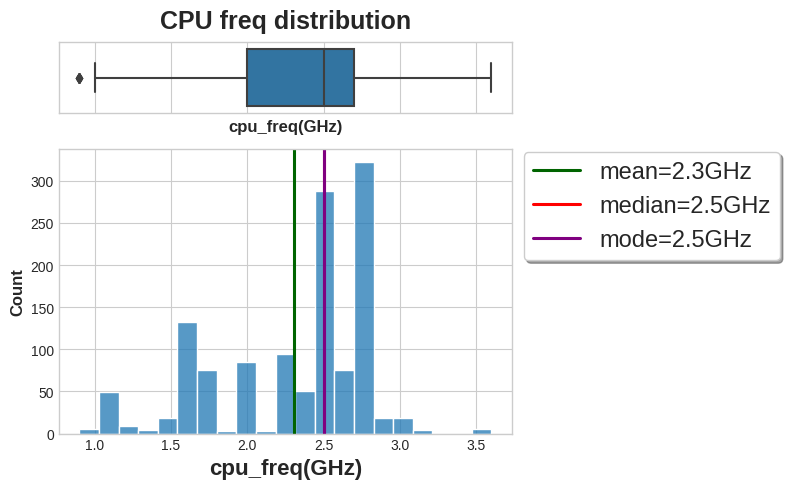

In [ ]:
num_plot(df_clean, 'cpu_freq(GHz)','CPU freq distribution','GHz')

In [ ]:
print('Most laptops have 2.5 GHz CPU, which make {}% of the total laptops'.format(np.round(len(df[df['cpu_freq(GHz)']==2.5])*100/len(df),2)))

Most laptops have 2.5 GHz CPU, which make 22.49% of the total laptops


## How is Hard Drive capacity distributed among the laptops?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1303 non-null   object 
 1   product              1303 non-null   object 
 2   typename             1303 non-null   object 
 3   inches               1303 non-null   float64
 4   cpu                  1303 non-null   object 
 5   ram(GB)              1303 non-null   int64  
 6   cpu_brand            1303 non-null   object 
 7   gpu_brand            1303 non-null   object 
 8   memory               1303 non-null   object 
 9   gpu                  1303 non-null   object 
 10  opsys                1303 non-null   object 
 11  weight(Kg)           1253 non-null   float64
 12  price                1303 non-null   float64
 13  resolution           1303 non-null   object 
 14  screentype           365 non-null    object 
 15  touchscreen          1303 non-null   f

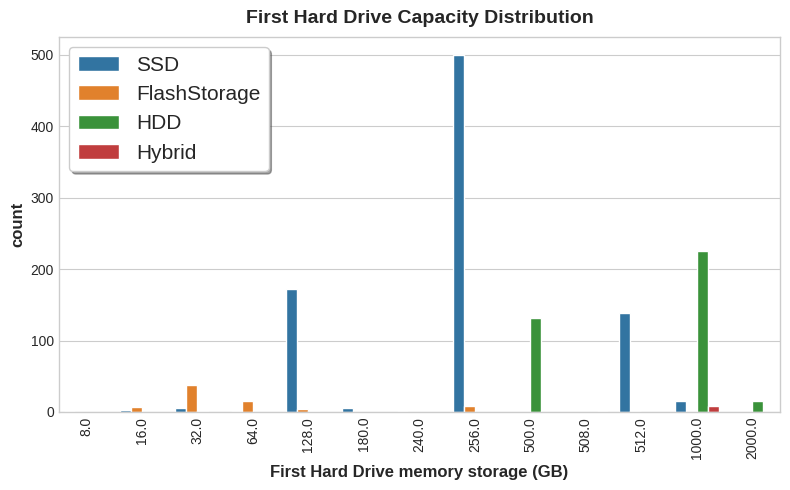

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory1_storage(GB)', data=df, hue='memory1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('First Hard Drive memory storage (GB)')
plt.title('First Hard Drive Capacity Distribution')
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

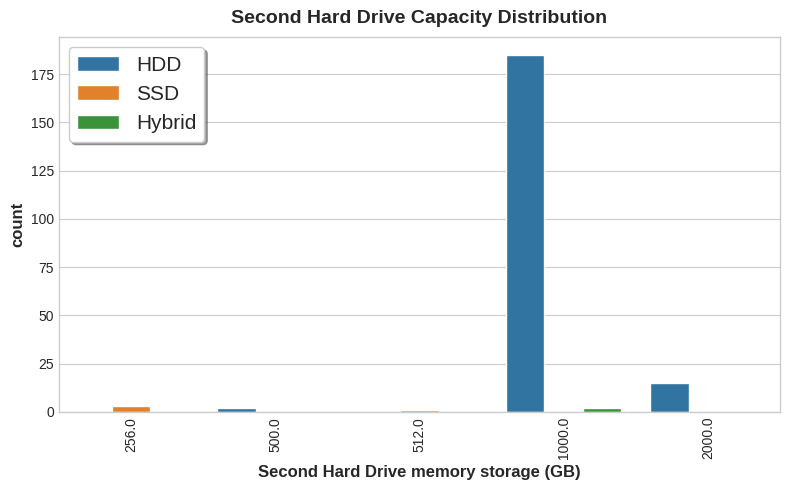

In [ ]:
fig, ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory2_storage(GB)', data=df, hue='memory2_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Second Hard Drive memory storage (GB)')
plt.title('Second Hard Drive Capacity Distribution')
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

## Price VS CPU brand by GPU brand

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1303 non-null   object 
 1   product              1303 non-null   object 
 2   typename             1303 non-null   object 
 3   inches               1303 non-null   float64
 4   cpu                  1303 non-null   object 
 5   ram(GB)              1303 non-null   int64  
 6   cpu_brand            1303 non-null   object 
 7   gpu_brand            1303 non-null   object 
 8   memory               1303 non-null   object 
 9   gpu                  1303 non-null   object 
 10  opsys                1303 non-null   object 
 11  weight(Kg)           1253 non-null   float64
 12  price                1303 non-null   float64
 13  resolution           1303 non-null   object 
 14  screentype           365 non-null    object 
 15  touchscreen          1303 non-null   f

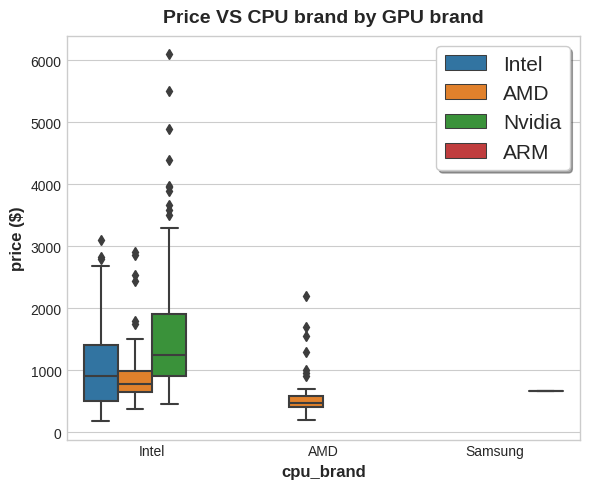

In [ ]:
cpu_palette = {'Intel':'#0d98ba', 'AMD':'#FF0000', 'Nvidia':'#46C646'}
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(x='cpu_brand', y='price', data=df, hue='gpu_brand')
ax.set_title('Price vs CPU brand by GPU brand')
plt.ylabel('price ($)')
plt.legend(loc='upper right', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.title('Price VS CPU brand by GPU brand')
plt.show()

Insights from this plot:

* Laptop yang menggunakan CPU Intel, relatif lebih mahal dibandingkan AMD dan samsung.
* Laptop dengan CPU AMD, hanya menggunakan GPU bertipe AMD saja.
* 75% data dengan penggunaan CPU Intel, dan GPU Intel, memiliki range harga dibawah kurang lebih 1600 dollar.
* rata-rata laptop termahal, terdapat pada laptop yang menggunakan CPU Intel, dan GPU Nvidia.
* Dari ketiga jenis laptop yang menggunakan cpu Intel, persebaran laptop dengan GPU Intel, memiliki persebaran yang paling sedikit.
* Samsung galaku? hehehe

## Which are the TOP 15 most common GPUs?

In [ ]:
gpu_list = df_clean['gpu'].value_counts()[:15].index.tolist()

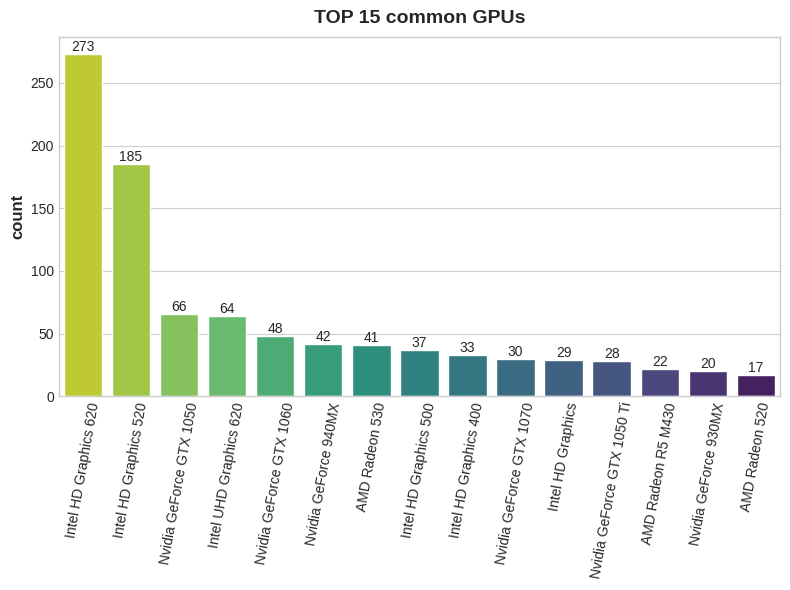

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='gpu', data=df_clean[df_clean['gpu'].isin(gpu_list)], order = gpu_list, palette='viridis_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common GPUs')
plt.xlabel('')
plt.show()

## Which are the TOP 15 most common CPUs?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1303 non-null   object 
 1   product              1303 non-null   object 
 2   typename             1303 non-null   object 
 3   inches               1303 non-null   float64
 4   cpu                  1303 non-null   object 
 5   ram(GB)              1303 non-null   int64  
 6   cpu_brand            1303 non-null   object 
 7   gpu_brand            1303 non-null   object 
 8   memory               1303 non-null   object 
 9   gpu                  1303 non-null   object 
 10  opsys                1303 non-null   object 
 11  weight(Kg)           1253 non-null   float64
 12  price                1303 non-null   float64
 13  resolution           1303 non-null   object 
 14  screentype           365 non-null    object 
 15  touchscreen          1303 non-null   f

In [ ]:
cpu_list = df_clean['cpu_type'].value_counts()[:15].index.tolist()

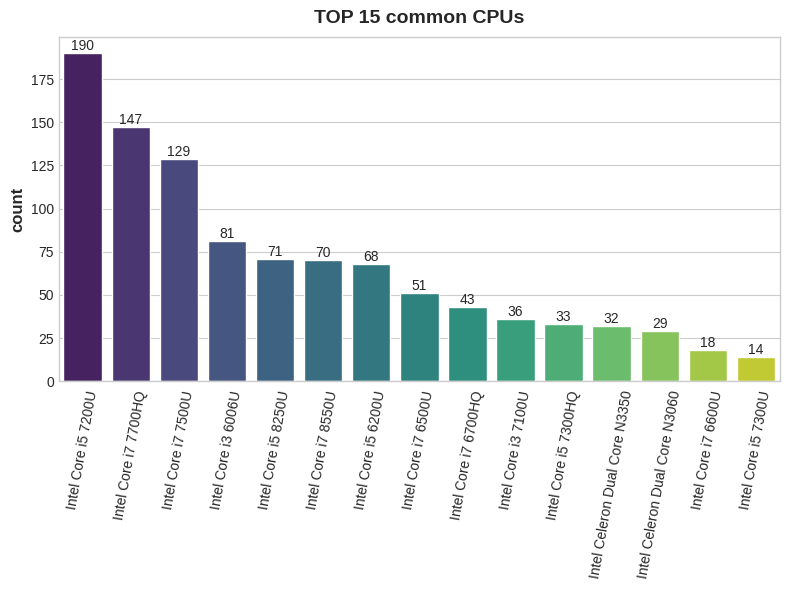

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='cpu_type', data=df_clean[df_clean['cpu_type'].isin(cpu_list)], order = cpu_list, palette='viridis')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common CPUs')
plt.xlabel('')
plt.show()

## What is the average price of laptops by company?

In [ ]:
company_list = df['company'].value_counts().index[:8].tolist()
company_list

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple']

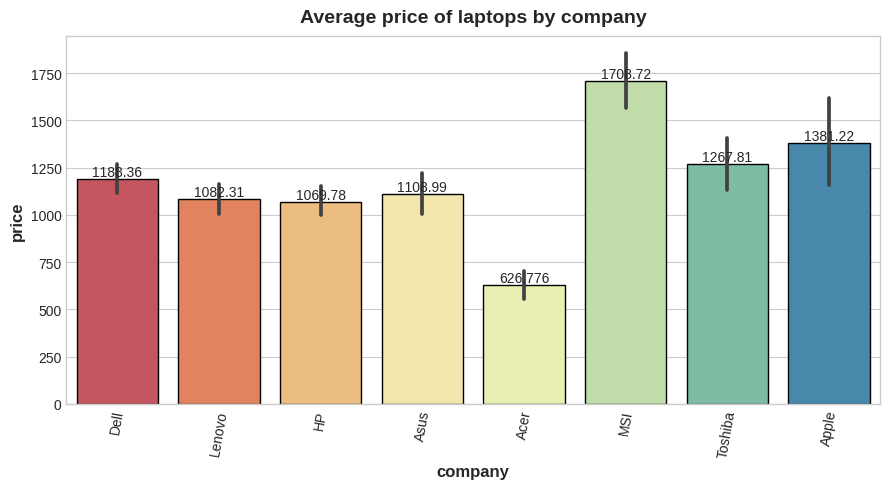

In [ ]:
plt.figure(figsize=(9,5))
ax=sns.barplot(x='company', y='price', data=df_clean[df_clean['company'].isin(company_list)],
                order=company_list,
                palette='Spectral',
                #ci=False,
                edgecolor="black")
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company')
plt.show();

insight :
- rata-rata harga laptop paling tinggi laptop MSI.
- rata-rata harga laptop paling murah itu acer.
- rata-rata kisaran laptop di harga 1250 dollar - 1000 dollar.